# Telecom Customer Churn   


Telecommunication market is expanding day by day. Companies are facing a severe loss of revenue due to increasing competition hence the loss of customers. They are trying to find the reasons of losing customers by measuring customer loyalty to regain the lost customers.  In telecommunication industry each company provides the customers with huge incentives to lure them to switch to their services, it is one of the reasons that customer churn is a big problem in the industry nowadays. To prevent this, the company should know the reasons for which the customer decides to move on to another telecom company. It is very 
difficult to keep customers intact for long duration as they move to the service that suits most of their needs.

The customers leaving the current company and moving to another telecom company are called churn. The operator's process to retain the profitable customers (Churn management) is very important for reducing churns as acquiring a new customer is more expensive than retaining the existing ones. If the reason for churning is known, the providers can then improve their services to fulfill the needs of the customers.

This is an Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features) related to calls, subscriptions to calling and messages plans, etc., along with a churn label specifying whether a customer canceled the subscription to the company. Based on these features, in this project we will predict customer churns and shed light on the reasons that lead customers leave in order to take preventive actions.

## 1. Description and objetives  

### 1.1 Description  

The description of all the attributes in the dataset:

In [2]:
%run data_description

### 1.2 Objetives  

The main goal is **interpretation: what are the main features making customers leave the company**, in order to plan preventive strategies. So we will create different classification models and analiyze parameters to shed light on what variables have strongest influence on Churns. We need good scores on minority class (Churn) so the model is reliable and accurate to explain the profile of customers that decide to leave, so a good predictive power is desirable.

To this purpose, we will try some classification algorithms as Logistic Regression, SVM and Decission Trees based methods, where *Churn* is the target variable and messure errors with metrics like accuracy, recall, precision and f1. We may be more interested on a good **recall** score to avoid missing all those customers that actually are likely to churn. We will look for a good recall specially, but without overlooking the fact that we need an accurate and interpretable model, so a good trade-off between both metrics (with f1 socre) will be taken into account. 

We can use the best model obtained from this project to guide business strategies to retain customers, for example by improving those offers of plans and calling services more related to churns, or taking actions to reduce customer reasons to call to the Customer Service and/or improving the assistance. In general, we can bring out from this analysis the reasons that make clients leave the company to enhance their satisfaction and find client engagement strategies. In addition to taking advantage of the model interpretation, we can also use predictions for the expected earnings of the company and resources management.

## 2. Exploratory Data Analysis  

This is the general guide line followed for the EDA in the project:

**2.1 Data Exploration:** Exploration of the values and data types. Representation of the variables in histograms and pair plots 

**2.2 Data cleaning:** Clean the data, handling possible wrong values, NaN and outliers. 

**2.3 Feature engineering:** Create dummies for categorical variables: *State, Intl Plan, Vmail Plan and Churn*. Logistic Regression and SVM will require numeric data. We will drop *Phone* as it doesn't have any influence. A Scaling method will be applied for a good performance of those distance-based algorithms, but this will take place on the 3rd section, when modeling

### 2.1 Data Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

In [4]:
data = pd.read_csv('Customer Churn Model.txt')
data.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [5]:
data.describe().T

count        mean        std     min     25%     50%     75%  \
Account Length  3333.0  101.064806  39.822106    1.00   74.00  101.00  127.00   
Area Code       3333.0  437.182418  42.371290  408.00  408.00  415.00  510.00   
VMail Message   3333.0    8.099010  13.688365    0.00    0.00    0.00   20.00   
Day Mins        3333.0  179.775098  54.467389    0.00  143.70  179.40  216.40   
Day Calls       3333.0  100.435644  20.069084    0.00   87.00  101.00  114.00   
Day Charge      3333.0   30.562307   9.259435    0.00   24.43   30.50   36.79   
Eve Mins        3333.0  200.980348  50.713844    0.00  166.60  201.40  235.30   
Eve Calls       3333.0  100.114311  19.922625    0.00   87.00  100.00  114.00   
Eve Charge      3333.0   17.083540   4.310668    0.00   14.16   17.12   20.00   
Night Mins      3333.0  200.872037  50.573847   23.20  167.00  201.20  235.30   
Night Calls     3333.0  100.107711  19.568609   33.00   87.00  100.00  113.00   
Night Charge    3333.0    9.039325   2.275873    1.04    7.52    9.05   10.59   
Intl Mins       3333.0   10.237294   2.791840    0.00    8.50   10.30   12.10   
Intl Calls      3333.0    4.479448   2.461214    0.00    3.00    4.00    6.00   
Intl Charge     3333.0    2.764581   0.753773    0.00    2.30    2.78    3.27   
CustServ Calls  3333.0    1.562856   1.315491    0.00    1.00    1.00    2.00   

                   max  
Account Length  243.00  
Area Code       510.00  
VMail Message    51.00  
Day Mins        350.80  
Day Calls       165.00  
Day Charge       59.64  
Eve Mins        363.70  
Eve Calls       170.00  
Eve Charge       30.91  
Night Mins      395.00  
Night Calls     175.00  
Night Charge     17.77  
Intl Mins        20.00  
Intl Calls       20.00  
Intl Charge       5.40  
CustServ Calls    9.00

In [6]:
#Number of rows and columns
print("Number of data points: {}".format(data.shape[0]), "\nNumber of variables: {}".format(data.shape[1]))

#Missing Values (NaN or None)
print("Missing values: {}".format(data.isnull().sum().sum()))

#Column names, data types and counts
data_types = data.dtypes
data_counts = data.count()
nunique = data.apply(lambda column: column.nunique())
df = pd.concat([data_types, data_counts, nunique], axis=1).reset_index()
df = df.rename(columns={'index': 'Column names' , 0: 'Types', 1: 'Counts', 2: 'num of uniques'})
display(df)

Number of data points: 3333 
Number of variables: 21
Missing values: 0


Column names    Types  Counts  num of uniques
0            State   object    3333              51
1   Account Length    int64    3333             212
2        Area Code    int64    3333               3
3            Phone   object    3333            3333
4       Int'l Plan   object    3333               2
5       VMail Plan   object    3333               2
6    VMail Message    int64    3333              46
7         Day Mins  float64    3333            1667
8        Day Calls    int64    3333             119
9       Day Charge  float64    3333            1667
10        Eve Mins  float64    3333            1611
11       Eve Calls    int64    3333             123
12      Eve Charge  float64    3333            1440
13      Night Mins  float64    3333            1591
14     Night Calls    int64    3333             120
15    Night Charge  float64    3333             933
16       Intl Mins  float64    3333             162
17      Intl Calls    int64    3333              21
18     Intl Charge  float64    3333             162
19  CustServ Calls    int64    3333              10
20          Churn?   object    3333               2

#### Histograms

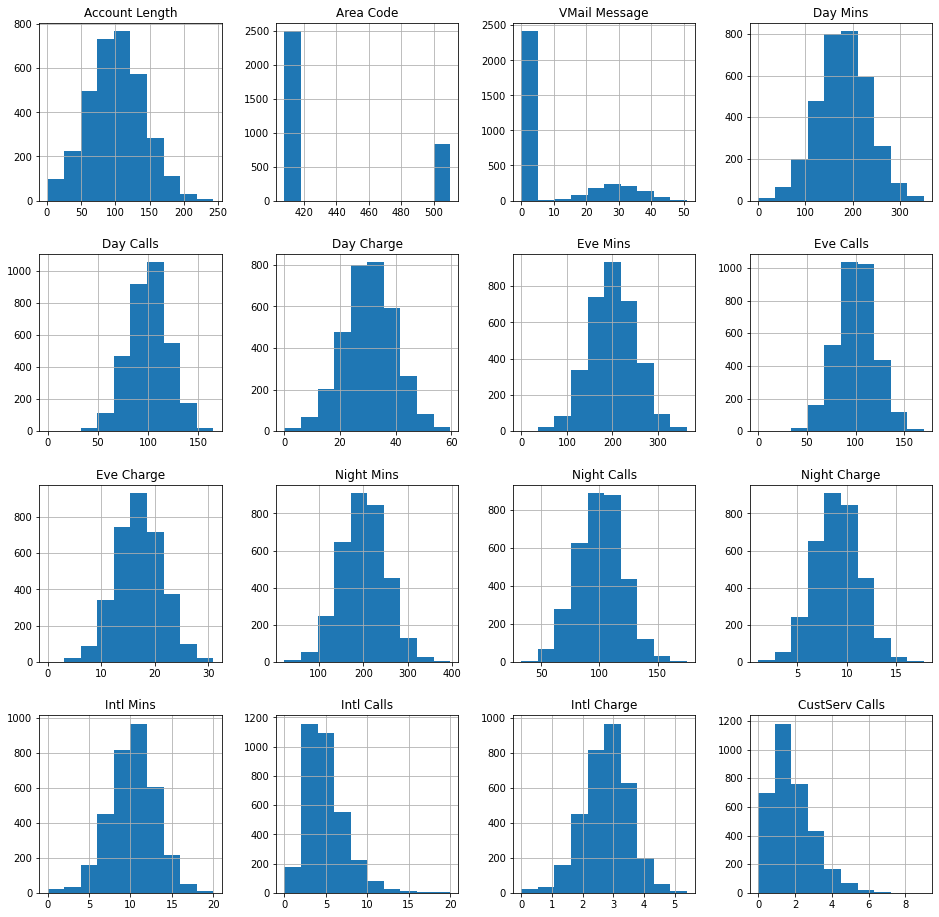

In [7]:
data.hist(figsize=(16,16));

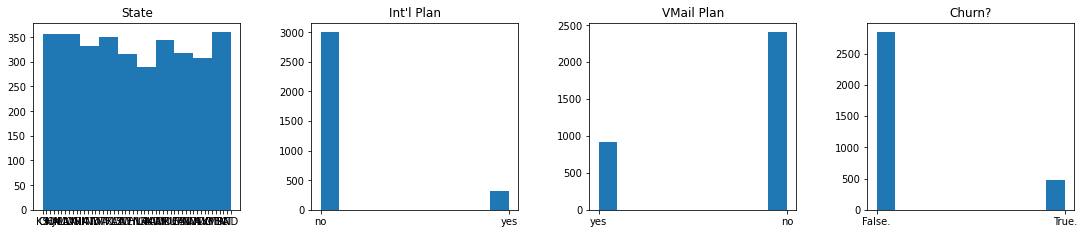

In [8]:
data = data.drop('Phone', axis=1)

objects = data.columns[data.dtypes==object]

fig, axes = plt.subplots(1,4, figsize=(16,4))
axes = axes.flatten()
fig.tight_layout(pad=4.0)
for i in range(axes.shape[0]):
    axes[i].hist(data[objects[i]])
    axes[i].set_title(objects[i])

We see that the outcome variable ***Churn* is unbalanced**

#### Correlations

<AxesSubplot:>

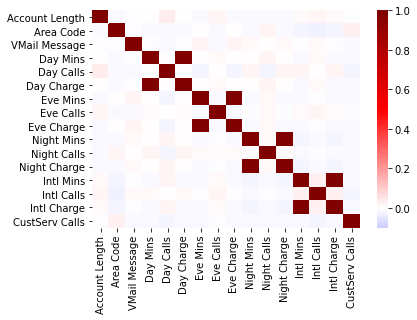

In [9]:
sns.heatmap(data.corr(), cmap='seismic', center=0, vmin=-0.1)

In [10]:
print(data[['Day Charge', 'Day Mins']].corr(), "\n")
print(data[['Eve Charge', 'Eve Mins']].corr(), "\n")
print(data[['Night Charge', 'Night Mins']].corr())

            Day Charge  Day Mins
Day Charge         1.0       1.0
Day Mins           1.0       1.0 

            Eve Charge  Eve Mins
Eve Charge         1.0       1.0
Eve Mins           1.0       1.0 

              Night Charge  Night Mins
Night Charge      1.000000    0.999999
Night Mins        0.999999    1.000000


*"Day Charge"* variables and "*Mins*" variables are 100% correlated. We can drop one of them for each time of the day (Day, Eve, Night), for example, ***Day Charge*, *Eve Charge*, *Night Charge* can be dropped** as they are redundant. Let's drop these redundant variables:  

In [11]:
data2 = data.drop(['Day Charge', 'Night Charge', 'Eve Charge'], axis=1)

To see correlations with the outcome variable *Churn* we have to encode it to get a numeric data type for *Churn* and be able to calculate the correlations. We will do it below at the end of "getting dummies" subsection, at the 4th point "Feature Engineering"

#### Pairplots

Let's plot the pairplots to see what pairs of variables make the greatest difference between *Churn* and *Not Churn* classes:

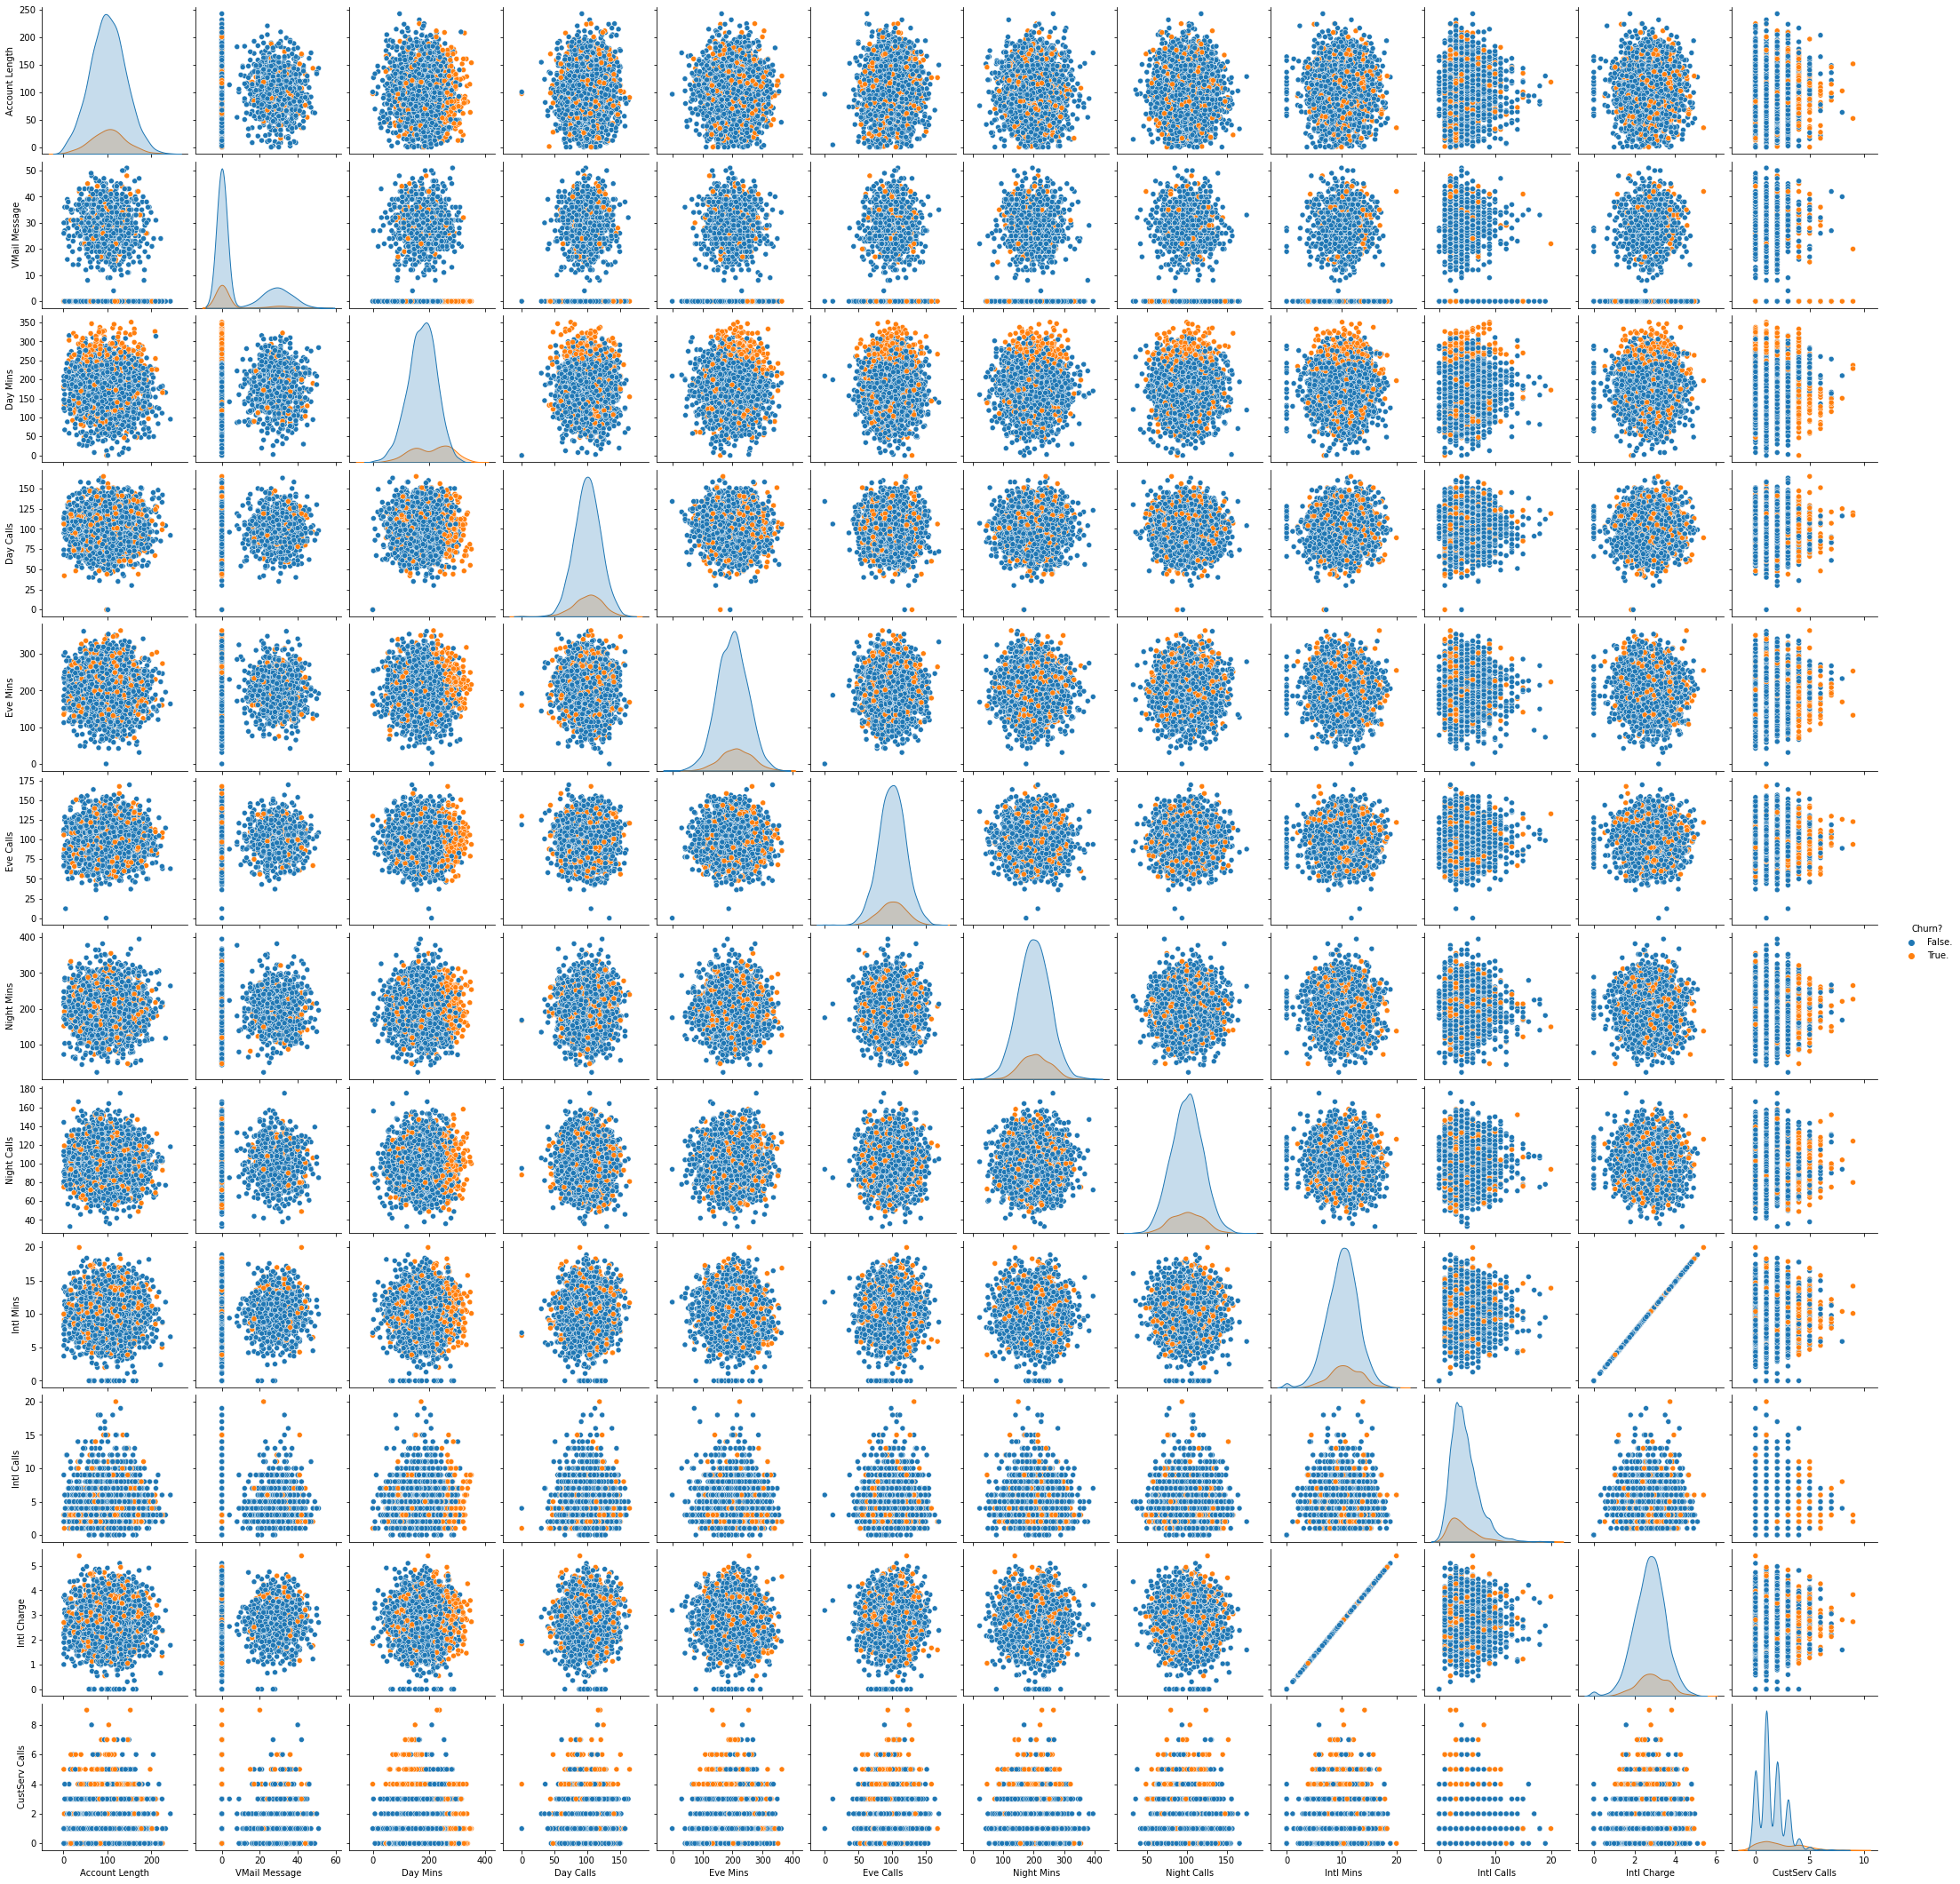

In [12]:
sns.pairplot(data2.drop(['Area Code'], axis=1), hue='Churn?') #, corner=True

***Day Mins*** and ***CustServ Calls*** seems to be the most important variable that determine whether a customer churn or not

In [13]:
# fig, axes = plt.subplots(3,5, figsize=(16,12))
# axes=axes.flatten()
# axes[-1].axis('off')
# fig.tight_layout(pad=3.0)
# for i,col in enumerate(data.columns.drop(['State','Area Code','Day Charge', 'Night Charge', 'Eve Charge','Churn?'])):
#     sns.scatterplot(x=data['Day Mins'], y=data.loc[:,col], hue=data['Churn?'], ax=axes[i])

#### Distribution of data and finding outliers

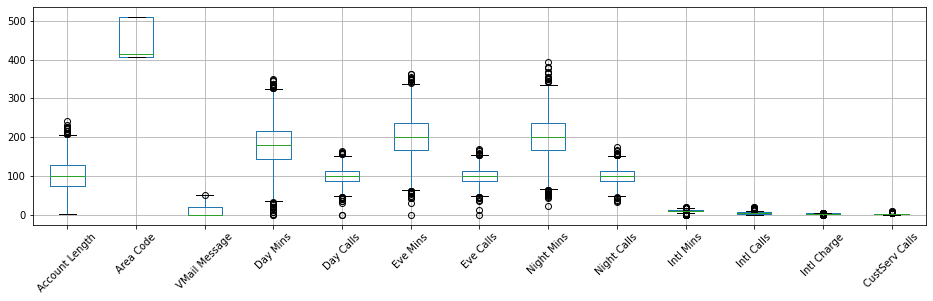

In [14]:
data2.boxplot(figsize=(16,4))
plt.xticks(rotation=45);

Outliers are not excesive, and they can be meaningfull. The most extreme are those 5 corresponding to *Day Calls, Eve Mins, Eve Calls and Night Mins*, which may describe the reality of some customers

### 2.2 Data cleaning  

As we saw in the previous section, there are not missing values, NaNs or Nones. About outliers, we have decided not to eliminate the few of them, considering them meaningfull and anyway not excesive. So no much data cleaning is needed in this case. We are going to change the *Churn* data type from object to integer (0: Not Churn, 1: Churn), firstly by removing the final point, then using `eval(str)` to directly evaluate the expression within the string and get the bool data type, and then using `int()`. Then we'll change the column name from Churn? to Churn

In [15]:
data2['Churn?'] = data2['Churn?'].apply(lambda row: int(eval(row.replace('.',''))))
data2 = data2.rename(columns={'Churn?': 'Churn'})

### 2.3 Feature engineering  

A) Firstly, we can know intuitively that the variables *State* and *Area Code* might not have any influence on the outcome *Churn*, and if so, we can drop them previously to getting dummies. We will perform a indepencency Chi2 test for this purpose

B) Secondly we will continue with getting the dummy variables for *'Int'l Plan', 'VMail Plan' and 'Churn'*

#### A) Hypothesis Chi2 tests to prove independency with the output *Churn* and dropping these no-influencing vairables

In [16]:
#Hypothesis Chi2 test of independency: Churn doesn't depend on State
from scipy.stats import chi2

churn_states = pd.crosstab(data2['State'], data2['Churn'])
churn_prop = data2['Churn'].value_counts(normalize=True)
churn_prop_obs = churn_states.apply(lambda row: row/churn_states.sum(axis=1))

chi2_stat = (((churn_prop_obs-churn_prop)**2)/churn_prop).sum().sum()
print("Chi2 Statistic: {}".format(chi2_stat))
print("p-value: {}".format(1- chi2.cdf(chi2_stat, df=50)))
print("Null hypothesis accepted: Churn Customers are independent of the State")

Chi2 Statistic: 1.3377715674300725
p-value: 1.0
Null hypothesis accepted: Churn Customers are independent of the State


In [17]:
#Hypothesis Chi2 test of independency: Churn doesn't depend on Area Code

churn_areacode = pd.crosstab(data2['Area Code'], data2['Churn'])

churn_prop = data2['Churn'].value_counts(normalize=True)
churn_prop_obs = churn_areacode.apply(lambda row: row/churn_areacode.sum(axis=1))

chi2_stat = (((churn_prop_obs-churn_prop)**2)/churn_prop).sum().sum()
print("Chi2 Statistic: {}".format(chi2_stat))
print("p-value: {}".format(1- chi2.cdf(chi2_stat, df=2)))
print("Null hypothesis accepted: Churn Customers are independent of the Area Code")

Chi2 Statistic: 0.00016935703783771126
p-value: 0.9999153250662057
Null hypothesis accepted: Churn Customers are independent of the Area Code


*Churn* is independent of the *State* and the *Area Code*, so let's **drop these variables *State* and *Area Code***

In [18]:
# Dropping State and Area Code
data2 = data2.drop(['State', 'Area Code'], axis=1)

#### Getting Dummies

In [19]:
# Getting Dummies for the rest of Objects: Int'l Plan, Vmail Plan and Churn
categorical_vars = ["Int'l Plan", "VMail Plan", "Churn"]
dummies = pd.get_dummies(data2[categorical_vars], drop_first=True)

data_dummies = pd.concat([data2.drop(categorical_vars, axis=1), dummies], axis=1)
data_dummies.head()

Account Length  VMail Message  Day Mins  Day Calls  Eve Mins  Eve Calls  \
0             128             25     265.1        110     197.4         99   
1             107             26     161.6        123     195.5        103   
2             137              0     243.4        114     121.2        110   
3              84              0     299.4         71      61.9         88   
4              75              0     166.7        113     148.3        122   

   Night Mins  Night Calls  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91       10.0           3         2.70   
1       254.4          103       13.7           3         3.70   
2       162.6          104       12.2           5         3.29   
3       196.9           89        6.6           7         1.78   
4       186.9          121       10.1           3         2.73   

   CustServ Calls  Churn  Int'l Plan_yes  VMail Plan_yes  
0               1      0               0               1  
1               1      0               0               1  
2               0      0               0               0  
3               2      0               1               0  
4               3      0               1               0

Now that we have the outcome "*Churn*" encoded, we can see the **correlations with *Churn* one and the others:**

<AxesSubplot:>

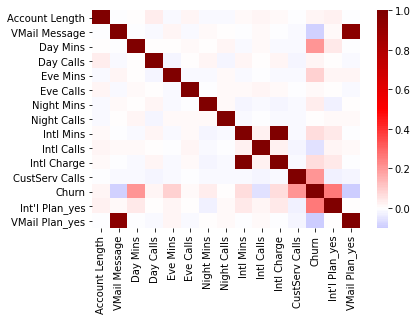

In [20]:
sns.heatmap(data_dummies.corr(), cmap='seismic', center=0, vmin=-0.1)

*Day Mins*, *CustServ Calls* and *Int'l Plan_yes* are the most correlated with the outcome, as it was reflected on the pairplots too.  

Here we see the **almost perfect correlation between *VMail Message* and *VMail Plan_yes***, coinciding all of the *VMail Plan_yes = 0* with *VMail Message = 0* as customers that are not suscribed to the voice messages plan don't send any voice message. Including both on our models can lead to unnecessary complexity and overfitting, so we are going to get rid of one of them. Checking correlations, both are similarly correlated with the outcome *Churn*, but the correlation of *VMail Message* with *Churn* is due to *VMail Plan_yes* mainly, that is, customers with *VMail Message=0* have a relative high Churn rate, while those with *VMail Message $\neq$ 0* are hardly correlated with churn:

In [21]:
r = data_dummies[data_dummies['VMail Message']!=0].corr()['Churn']['VMail Message']
r

0.06568135997657304

Although this correlation could be significative:

In [22]:
n = data_dummies[data_dummies['VMail Message']!=0].shape[0]
t_stat = r*(np.sqrt(n-2))/np.sqrt(1-r**2)
t_stat

1.9965254879478838

This value is lower than $t_{0.99}$ but greater that $t_{0.95}$. So *VMail Message* could be significantly correlated with *Churn* in the subset with *VMail Message $\neq$ 0*. Still is better removing *VMail Message* because the correlation with Churn, as we said, is due to the correlation between *VMail Plan_yes* and *Churn*. So let's **drop *VMail Message*** from our dummy dataset:

In [23]:
data_dummies = data_dummies.drop('VMail Message', axis=1)

## 3. Classification models for the prediction of *Churn*

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

### 3.1 Train-Test Split and Scaling

We are going to perform Stratified Train-test split as we are working with an unbalanced dataset. Later below we will get balanced clases.

Scaling features will be convenient to get directly comparable coefficients, where the highest value, the more importante the corresponding feature will be. When adding regularization, scaling is not convenient but necessary, so as we will have to add regularization to our SVC, features should be in similar scales in order not to penalize excesively one of them just because of its low scale and thus large coefficient. 

What scaling method is appropiate? When deciding what Scaling method to use, we have to think of what amount of each feature would be comparable to the others. So,for example, if we decide using *MaxMinScaler*, features will have values in the interval [0,1], so the difference in binary variables (*Int'l Plan* and *VMail Plan*) between having one of those plans or not, would be equivalent to the difference between 0 minutes (the min) of Day Calls and 350 minutes (the max), resulting in a non realistic importance given to *Int'l Plan* and *VMail Plan*. The difference between having these Plans or not should not be equivalent to just 1 minute of a call and that is why we have to do scaling, but also should not be equivalent to 350 min. A **Standard Scaling** will work well in order to get reasonable scales of our features:

In [25]:
#Train-test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_index, test_index = next(sss.split(X=data_dummies.drop('Churn', axis=1), y=data2['Churn']))

X_train = data_dummies.loc[train_index, data_dummies.columns.drop('Churn')]
y_train = data_dummies.loc[train_index, 'Churn']
X_test = data_dummies.loc[test_index, data_dummies.columns.drop('Churn')]
y_test = data_dummies.loc[test_index, 'Churn']

#Standard Scaling
scaler = StandardScaler()
cols = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=train_index, columns=cols)
X_test = pd.DataFrame(scaler.transform(X_test), index=test_index, columns=cols)

### 3.2 Logistic Regression with the original Unbalanced Dataset

In [26]:
#Checking proportions
df_counts = pd.concat([data2['Churn'].value_counts(normalize=True), 
                       y_train.value_counts(normalize=True),
                       y_test.value_counts(normalize=True)], axis=1)
df_counts.columns = ['Dataset','Training set','Test set']
print("Classes proportions:\n\n", df_counts)

Classes proportions:

     Dataset  Training set  Test set
0  0.855086      0.855122     0.855
1  0.144914      0.144878     0.145


Baseline accuracy: 0.855


Accuracy         Precision            Recall            Fscore AUC ROC
0    0.866  [0.8847, 0.5873]  [0.9696, 0.2552]  [0.9252, 0.3558]  0.8127

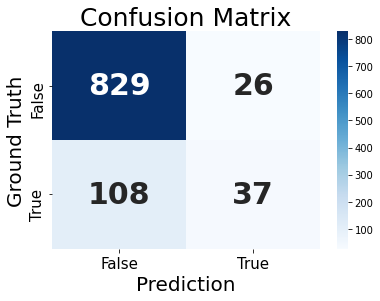

In [27]:
# Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, cmap='Blues', annot=True, annot_kws={"size": 30, "weight": "bold"}, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=25)

#Metrics
precision_lr, recall_lr, fscore_lr, _ = score(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
df_metrics_lr = pd.DataFrame([accuracy_lr.round(4),precision_lr.round(4),recall_lr.round(4),fscore_lr.round(4),
                              roc_auc_lr.round(4)], 
             index=['Accuracy','Precision','Recall','Fscore','AUC ROC'])
print("Baseline accuracy: {:.3f}".format(data_dummies['Churn'].value_counts(normalize=True)[0]))
display(df_metrics_lr.T)

We overperformed the baseline (a model that would simply predict "Not Churn" (0) for all data points), however, it is still a poor model. Accuracy roughly has improved and **we got low scores for the "Churn" class (1 or True).** 

### 3.3 Logistic Regression with Balanced Dataset

#### 3.3.1 Selecting `class_weight='balanced'` argument of LogisticRegression to get balanced classes

Baseline accuracy: 0.855


Accuracy         Precision           Recall           FScore AUC ROC
0    0.759  [0.9436, 0.3442]  [0.7637, 0.731]  [0.8442, 0.468]  0.8175

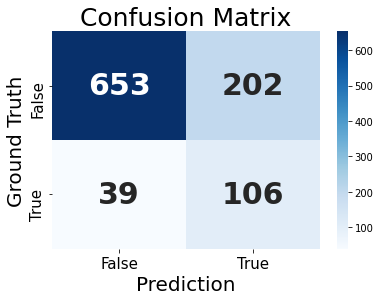

In [28]:
# Logistic Regression with balanced dataset
lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, cmap='Blues', annot=True, annot_kws={"size": 30, "weight": "bold"}, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=25)

#Metrics
precision_bal, recall_bal, fscore_bal, _ = score(y_test, y_pred)
accuracy_bal = accuracy_score(y_test, y_pred)
roc_auc_bal = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
df_metrics_bal = pd.DataFrame([accuracy_bal.round(4),precision_bal.round(4),recall_bal.round(4),fscore_bal.round(4),
                              roc_auc_bal.round(4)], 
             index=['Accuracy','Precision','Recall','FScore','AUC ROC'])
print("Baseline accuracy: {:.3f}".format(data_dummies['Churn'].value_counts(normalize=True)[0]))
display(df_metrics_bal.T)

#### 3.3.2 Random Resampling to get balanced classes  

Unbalanced dataset has not a good performance on the minority class, so let's do a resampling to get a balanced dataset. In this case, a random resampling will be just right, so picking a random subsample of the mayority class (not churn, 0) and duplicating randomly the minority class with replacement.

Baseline accuracy: 0.855



Accuracy       Precision          Recall  \
338 Samples              0.745  [0.937, 0.325]  [0.752, 0.703]   
750 Samples              0.752   [0.94, 0.334]  [0.758, 0.717]   
1200 Samples             0.753  [0.943, 0.338]  [0.757, 0.731]   
1600 Samples             0.752  [0.943, 0.337]  [0.756, 0.731]   
1995 Samples             0.756  [0.943, 0.341]   [0.76, 0.731]   
LR Unbalanced Classes    0.866  [0.885, 0.587]   [0.97, 0.255]   
LR Weighted=Balanced     0.759  [0.944, 0.344]  [0.764, 0.731]   

                               FScore AUC ROC  
338 Samples            [0.835, 0.444]   0.812  
750 Samples            [0.839, 0.456]   0.817  
1200 Samples            [0.84, 0.462]   0.819  
1600 Samples           [0.839, 0.461]   0.816  
1995 Samples           [0.842, 0.465]   0.819  
LR Unbalanced Classes  [0.925, 0.356]   0.813  
LR Weighted=Balanced   [0.844, 0.468]   0.817

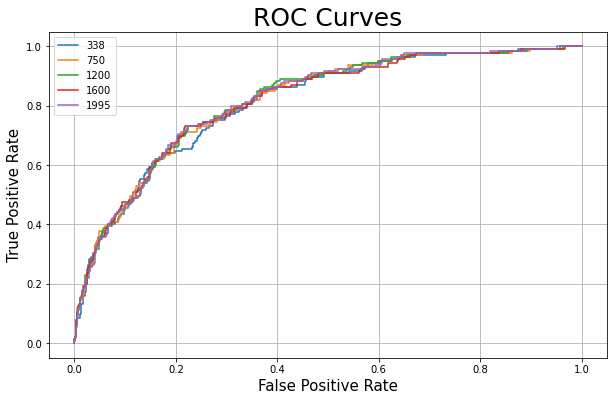

In [29]:
y_train_original = y_train.copy()
fig, ax = plt.subplots(figsize=(10,6))
print("Baseline accuracy: {:.3f}\n".format(data_dummies['Churn'].value_counts(normalize=True)[0]))

X_train_churn0 = X_train[y_train == 0]
X_train_churn1 = X_train[y_train == 1]

dataframe = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'FScore', 'AUC ROC'])

for i,s in enumerate([338,750,1200,1600, 1995]):

    #Creating resampled dataset
    X_train_churn1_up = X_train_churn1.sample(s, replace=True, random_state=42)
    X_train_churn0_down = X_train_churn0.sample(s, random_state=42)

    X_train_resampled = pd.concat([X_train_churn1_up, X_train_churn0_down])
    y_train_resampled = y_train_original.loc[X_train_resampled.index]
    counts = y_train_resampled.value_counts()

    #Model
    lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
    lr.fit(X_train_resampled, y_train_resampled)
    y_pred = lr.predict(X_test)

    #ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
    ax.plot(fpr, tpr, label=s)
    ax.legend()
    ax.set_xlabel('False Positive Rate', fontsize=15)
    ax.set_ylabel('True Positive Rate', fontsize=15)
    ax.set_title('ROC Curves', fontsize=25)
    ax.grid(True)

    #Metrics
    precision, recall, fscore, _ = score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    metrics = [accuracy.round(4)] + [[clase.round(3) for clase in metric] for metric in score(y_test, y_pred)[:-1]]
    metrics.append(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]).round(3))
    dataframe['{} Samples'.format(s)] = metrics


dataframe['LR Unbalanced Classes'] = [accuracy_lr.round(3), precision_lr.round(3), 
                                      recall_lr.round(3), fscore_lr.round(3), roc_auc_lr.round(3)]
dataframe['LR Weighted=Balanced'] = [accuracy_bal.round(3), precision_bal.round(3), 
                                      recall_bal.round(3), fscore_bal.round(3), roc_auc_bal.round(3)]
display(dataframe.T)

They are very similar, but with 1995 it seems to perform slightly better, so at the moment we will take **Logistic Regression with an upsampling of the minority class to 1995 samples**.   

This model has lower accuracy than the base model that predicts all "Not Churn", but we have improved the predictions of minority class (Churn, 1), which is in the end what we are more interested in if we want to focus the business strategies to those that are about to churn. Now let's try other classification algorithms.  

For the following sections we'll work with a balanced dataset by upsampling minority class to 1995 samples as the mayority class. Let's do this with a **SMOTE approach** instead of creating duplicates:  

#### 3.3.3 SMOTE Resampling to get balanced dataset 

In [30]:
#Resampling with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#Model
lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_test)

#Metrics
precision, recall, fscore, _ = score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
metrics = [accuracy.round(4)] + [[clase.round(3) for clase in metric] for metric in score(y_test, y_pred)[:-1]]
metrics.append(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]).round(3))
dataframe['SMOTE'] = metrics

dataframe.T

Accuracy       Precision          Recall  \
338 Samples              0.745  [0.937, 0.325]  [0.752, 0.703]   
750 Samples              0.752   [0.94, 0.334]  [0.758, 0.717]   
1200 Samples             0.753  [0.943, 0.338]  [0.757, 0.731]   
1600 Samples             0.752  [0.943, 0.337]  [0.756, 0.731]   
1995 Samples             0.756  [0.943, 0.341]   [0.76, 0.731]   
LR Unbalanced Classes    0.866  [0.885, 0.587]   [0.97, 0.255]   
LR Weighted=Balanced     0.759  [0.944, 0.344]  [0.764, 0.731]   
SMOTE                    0.756  [0.943, 0.341]   [0.76, 0.731]   

                               FScore AUC ROC  
338 Samples            [0.835, 0.444]   0.812  
750 Samples            [0.839, 0.456]   0.817  
1200 Samples            [0.84, 0.462]   0.819  
1600 Samples           [0.839, 0.461]   0.816  
1995 Samples           [0.842, 0.465]   0.819  
LR Unbalanced Classes  [0.925, 0.356]   0.813  
LR Weighted=Balanced   [0.844, 0.468]   0.817  
SMOTE                  [0.842, 0.465]   0.819

## 4. Support Vector Classifier

In [31]:
from sklearn.svm import SVC
from decision_boundary import plot_decision_boundary
from sklearn.model_selection import GridSearchCV

### 4.1 Support Vector Classifier

We are going to create a Support Vector Classifier model with a radial basis function (rbf), which may be suitable according to the size of our data. Let's using `GridSerachCV` to get the best hyperparameters, *gamma* and the regularization term *C*:

In [32]:
#SVC with all the 14 features

params = {
    'C': [0.1, 1, 10],
    'gamma': [.1, .5, 1, 2, 10]
}
grid = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=42), param_grid=params)
grid.fit(X_train, y_train)

display(pd.DataFrame([grid.best_score_, grid.best_params_, grid.score(X_test, y_test)], 
                     index=['Best Score', 'Best Params', 'Test Score']).T)

#Metrics
estimator = grid.best_estimator_
y_pred = estimator.predict(X_test)

precision_svc, recall_svc, fscore_svc, _ = score(y_test, y_pred)
accuracy_svc = accuracy_score(y_test, y_pred)
auc_roc_svc = roc_auc_score(y_test, estimator.predict_proba(X_test)[:,1])

df_metrics_svc = pd.DataFrame([accuracy_svc.round(4),precision_svc.round(4),recall_svc.round(4),
                               fscore_svc.round(4),auc_roc_svc.round(4)], 
             index=['Accuracy','Precision','Recall','FScore', 'AUC ROC'])
display(df_metrics_svc.T)

Best Score              Best Params Test Score
0   0.987469  {'C': 10, 'gamma': 0.5}      0.864

Accuracy         Precision            Recall            FScore AUC ROC
0    0.864  [0.8757, 0.6047]  [0.9801, 0.1793]  [0.9249, 0.2766]  0.8295

#### Decision boundary  

There are 3 variables, Day Mins, CustServ Calls and Int'l Plan_yes that were noticeably more correlated with the outcome, Churn, than the others. Let's plot the desicion boundary on the subspace of 2 of the 3 highest correlated variables with the outcome *Churn*:

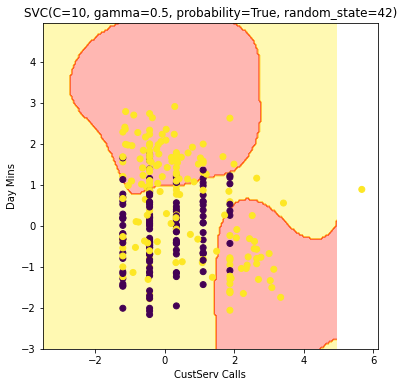

In [33]:
plot_decision_boundary(grid.best_estimator_, X_train[['CustServ Calls', "Day Mins"]], y_train)

# plot_decision_boundary(grid.best_estimator_, X_train[["Int'l Plan_yes", "Day Mins"]], y_train) 

#### SVC with only the 3 highest correlated with the outcome

Creating a GridSearchCV with the 3 most correlated variables with *Churn*, trying with [1,10,100,1000] as values of the regularization hyperparameter "C" and [0.5,1,2,10] for gamma, we got 1000 and 10 respectively as best parameters. We should with try higher values to get the optimal ones, but we probably won't obtain better results. So keeping this hyperparameters, let's create the model just to compare with the others:  

In [34]:
features = ['Day Mins', 'CustServ Calls', "Int'l Plan_yes"]

params = {
    'C': [1, 10, 100],
    'gamma': [.5, 1, 2, 10]
}
grid3 = GridSearchCV(SVC(kernel='rbf', probability=True, random_state=42), param_grid=params, verbose=True)
grid3.fit(X_train[features], y_train)

svc3 = grid3.best_estimator_

#Results
test_score = svc3.score(X_test.loc[:,features], y_test)
best_score = svc3.score(X_train[features], y_train)
best_params = svc3.get_params()['C'], svc3.get_params()['gamma']
display(pd.DataFrame([best_score, best_params, test_score], 
                     index=['Best Score', 'Best Params (C,gamma)', 'Test Score']).T)


#Metrics
estimator = svc3
y_pred = estimator.predict(X_test.loc[:,features])

precision_svc3, recall_svc3, fscore_svc3, _ = score(y_test, y_pred)
accuracy_svc3 = accuracy_score(y_test, y_pred)
auc_roc_svc3 = roc_auc_score(y_test, svc3.predict_proba(X_test.loc[:,features])[:,1])

df_metrics_svc3 = pd.DataFrame([accuracy_svc3.round(4),precision_svc3.round(4),recall_svc3.round(4),
                               fscore_svc3.round(4),auc_roc_svc3.round(4)], 
             index=['Accuracy','Precision','Recall','FScore', 'AUC ROC'])
display(df_metrics_svc3.T)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best Score Best Params (C,gamma) Test Score
0   0.898747             (100, 10)      0.834

Accuracy         Precision            Recall            FScore AUC ROC
0    0.834  [0.9333, 0.4488]  [0.8678, 0.6345]  [0.8994, 0.5257]    0.76

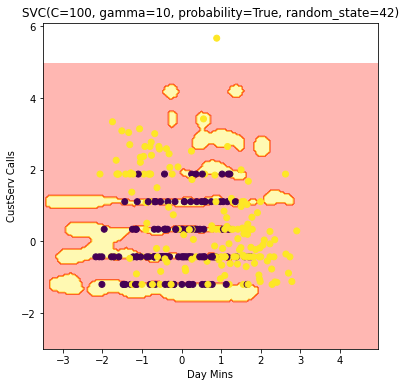

In [35]:
plot_decision_boundary(estimator, X_train[features[:-1]], y_train)

## 5. Bagging  

Models based on Decision Trees are probably one of the best options for interpretation. However, it has been worthly create the other types of classification models as Decision Trees doesn't tell us about *how much* each features influence the output probability. Combining the information from Bagging method we are going to perform next, and this from the Logistic Regression, at the end, in the <a href='apartado-6'>"Interpretation" section</a> we will get an idea of what variables have more impact on customer churns and we will reach a general conclusion.  

Let's create a bagging model finding the optimal number of base estimators, for which we will use `GridSearchCV`: 

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [1]:
params = {
    'n_estimators': [1,10,20,30,40,50,100,200,300,400,500]
}

grid_bagging = GridSearchCV(BaggingClassifier(random_state=42), param_grid=params)
grid_bagging.fit(X_train, y_train)

#Results
test_score = grid_bagging.score(X_test, y_test)
print("Best Model results")
display(pd.DataFrame([grid_bagging.best_score_, grid_bagging.best_params_, test_score], 
                     index=['Best Score', 'Best params', 'Test Score']).T)

NameError: name 'GridSearchCV' is not defined

In [37]:
#Metrics
estimator = grid_bagging.best_estimator_
y_pred = estimator.predict(X_test)

precision_bag, recall_bag, fscore_bag, _ = score(y_test, y_pred)
accuracy_bag = accuracy_score(y_test, y_pred)
auc_roc_bag = roc_auc_score(y_test, estimator.predict_proba(X_test)[:,1])
#ROC AUC no se puede porque tenia que haber puesto probability=True (ver documentacion de estimator)

df_metrics_bag = pd.DataFrame([accuracy_bag.round(4),precision_bag.round(4),recall_bag.round(4),
                               fscore_bag.round(4), auc_roc_bag.round(4)], 
             index=['Accuracy','Precision','Recall','FScore', 'AUC ROC'])
display(df_metrics_bag.T)

Accuracy         Precision           Recall           FScore AUC ROC
0    0.921  [0.9619, 0.7062]  [0.945, 0.7793]  [0.9534, 0.741]   0.901

## 6. Comparision: What is the best model?

In [38]:
models_metrics = [dataframe[['LR Unbalanced Classes']], dataframe[['LR Weighted=Balanced']], dataframe[['1995 Samples']], 
                  df_metrics_svc, df_metrics_svc3, df_metrics_bag]
labels = ['LR Unbalanced Classes', 'LR weighted=balanced', 'LR with oversampling (s=1995)', 'SVC', 'SVC 3 features', 
         'Bagging']
models_metrics = [df.rename(columns={0: labels[i]}) for i,df in enumerate(models_metrics)]

df_models = pd.concat(models_metrics, axis=1).T
df_models

Accuracy         Precision            Recall  \
LR Unbalanced Classes    0.866    [0.885, 0.587]     [0.97, 0.255]   
LR Weighted=Balanced     0.759    [0.944, 0.344]    [0.764, 0.731]   
1995 Samples             0.756    [0.943, 0.341]     [0.76, 0.731]   
SVC                      0.865  [0.8774, 0.6087]  [0.9789, 0.1931]   
SVC 3 features           0.831   [0.942, 0.4464]   [0.855, 0.6897]   
Bagging                  0.921  [0.9619, 0.7062]   [0.945, 0.7793]   

                                 FScore AUC ROC  
LR Unbalanced Classes    [0.925, 0.356]   0.813  
LR Weighted=Balanced     [0.844, 0.468]   0.817  
1995 Samples             [0.842, 0.465]   0.819  
SVC                    [0.9254, 0.2932]   0.826  
SVC 3 features          [0.8964, 0.542]  0.7599  
Bagging                 [0.9534, 0.741]   0.901

**Bagging** is the best predictive model, the one with the best scores for all metrics and, in particular, the one that performs better on the minority class "Churn", which we were more interested in. Because of that, we will use bagging for the final interpretation, along with Logistic Regression to get complementary information.

## 7. Predictions from the best model (Bagging): Confusion matrix, metrics and Curves

The confusion matrix for this model is:

Accuracy         Precision           Recall           FScore AUC ROC
Bagging    0.921  [0.9619, 0.7062]  [0.945, 0.7793]  [0.9534, 0.741]   0.901

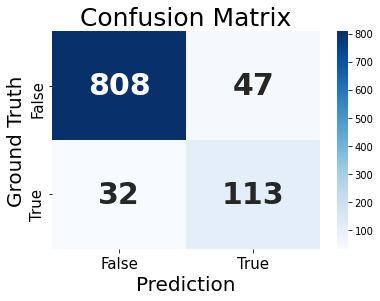

In [39]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, cmap='Blues', annot=True, annot_kws={"size": 30, "weight": "bold"}, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_ylabel('Ground Truth', fontsize=20);
ax.set_xlabel('Prediction', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=25)

#Metrics
display(pd.DataFrame(df_models.loc['Bagging']).T)

Text(0, 0.5, 'Precision')

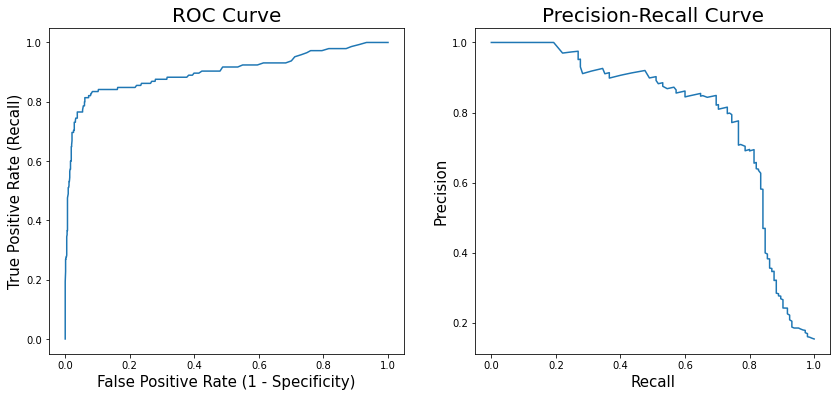

In [40]:
#Curves for Churn Class (1)

fig, axs = plt.subplots(1,2, figsize=(14,6))
axs = axs.flatten()

fpr, tpr, _ = roc_curve(y_test, estimator.predict_proba(X_test)[:,1])
axs[0].plot(fpr, tpr)
axs[0].set_title('ROC Curve', fontsize=20)
axs[0].set_xlabel('False Positive Rate (1 - Specificity)', fontsize=15)
axs[0].set_ylabel('True Positive Rate (Recall)', fontsize=15)

precision, recall, _ = precision_recall_curve(y_test, estimator.predict_proba(X_test)[:,1])
axs[1].plot(recall, precision)
axs[1].set_title('Precision-Recall Curve', fontsize=20)
axs[1].set_xlabel('Recall', fontsize=15)
axs[1].set_ylabel('Precision', fontsize=15)


## 8. Features Interpretation: Trees and Feature importances

### 8.1 Tree draw 

Here is one of the 400 trees of the best bagging estimator obtained from the GridSearchCV. The analysis of all the 400 base estimators (trees) together is done down below in the next section: Features importances of the trees

In [41]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [42]:
# Pruning one of the estimators

np.random.seed(42)
estimator = grid_bagging.best_estimator_
clf = np.random.choice(estimator.estimators_)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

i = -4
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[i])
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.016707489544511678, random_state=42)

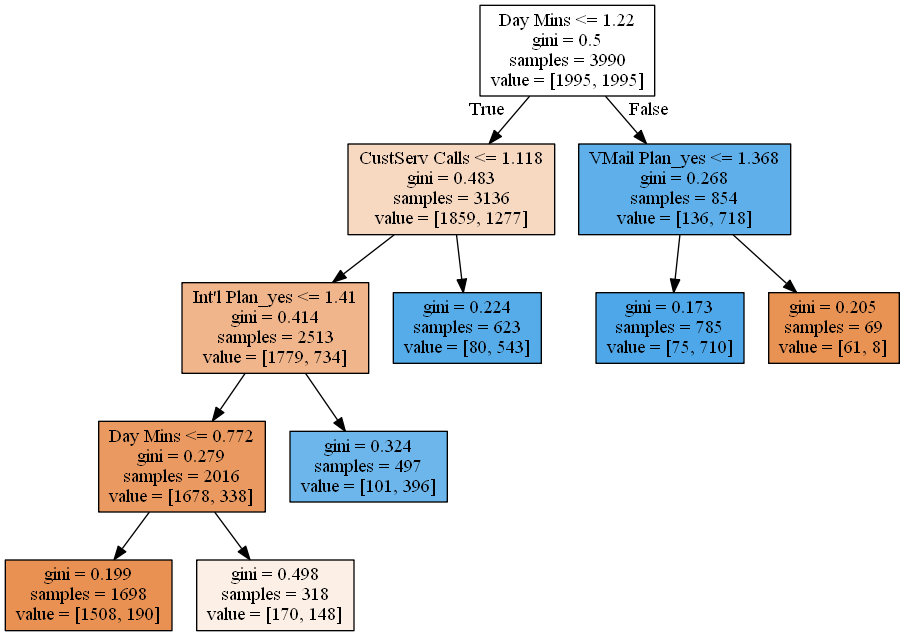

In [43]:
# Creating an output destination for the file
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, feature_names=X_train.columns) #See help(export_graphviz) for personalize
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'churn.png'
graph.write_png(filename)
Image(filename=filename) 
### END SOLUTION

### 8.2 Features importances of the trees  

In [44]:
# DataFrame with the importances of some trees (n_trees)
np.random.seed(42)
estimator = grid_bagging.best_estimator_

tree = np.random.choice(estimator.estimators_)
importances = pd.Series(tree.feature_importances_, index=X_train.columns).sort_values()
df = pd.DataFrame(importances)
n_trees = 3
for i in range(1,n_trees):
    tree = np.random.choice(estimator.estimators_)
    importances = pd.Series(tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    df[i] = importances

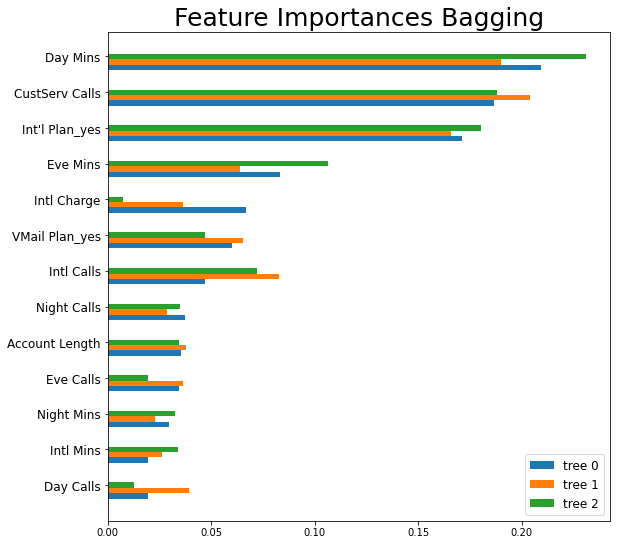

In [50]:
# Plotting feature importances

fig, ax = plt.subplots(figsize=(3*n_trees,3*n_trees))

labels = df.index
x = np.arange(labels.shape[0])
width = 0.15

for i in range(n_trees):
    ax.barh(y = x+width*i, width=df[i], height=width, label="tree "+str(i), tick_label=labels)
ax.set_yticklabels(labels, fontsize=12);
ax.set_title('Feature Importances Bagging', fontsize=25);
plt.legend(fontsize='large');

# IN VERTICAL:
    # fig, ax = plt.subplots(figsize=(16,4))
    # df2 = df.sort_values(by=0, ascending=False)
    # labels = df2.index
    # x = np.arange(labels.shape[0])
    # width = 0.05*n_trees
    # for i in range(n_trees):
    #     ax.bar(x = x+width*i, height=df2[i], width=width, label="tree "+str(i), tick_label=labels)
    # ax.set_xticks(x+width*n_trees/2)
    # ax.set_xticklabels(labels, rotation=65, fontsize=12);
    # ax.set_title('Feature Importances', fontsize=25);
    # plt.legend()

In [46]:
feature_importances = pd.DataFrame(columns=['{}-th more important'.format(x+1) for x in range(X_train.shape[1])])
for i,tree in enumerate(estimator.estimators_):
    feature_importances.loc['Estimator {}'.format(i)] = X_train.columns[tree.feature_importances_.argsort()[::-1]] 

nth = 3 
display(pd.DataFrame(feature_importances[feature_importances.columns[:nth]].value_counts(),
            columns=['Frec. (Num of trees)']))

Frec. (Num of trees)
1-th more important 2-th more important 3-th more important                      
Day Mins            CustServ Calls      Int'l Plan_yes                        319
CustServ Calls      Day Mins            Int'l Plan_yes                        123
Day Mins            Int'l Plan_yes      CustServ Calls                         55
CustServ Calls      Int'l Plan_yes      Day Mins                                3

In [47]:
nth=5
for i in range(1,nth):
    print(feature_importances['{}-th more important'.format(i)].value_counts(), "\n")

Day Mins          374
CustServ Calls    126
Name: 1-th more important, dtype: int64 

CustServ Calls    319
Day Mins          123
Int'l Plan_yes     58
Name: 2-th more important, dtype: int64 

Int'l Plan_yes    442
CustServ Calls     55
Day Mins            3
Name: 3-th more important, dtype: int64 

Eve Mins          373
Intl Calls         94
Intl Charge        24
Intl Mins           7
VMail Plan_yes      2
Name: 4-th more important, dtype: int64 



***Day Mins, CustServ Calls*** and ***Int'l Plan*** are the 3 most important features in all cases. A general order, would be: 

1. ***Day Mins:*** The total number of calling minutes used during the days
2. ***CustServ Calls:*** The number of calls placed to Customer Service
3. ***Int'l Plan:*** Whether the customer has an international calling plan

These 3 were the most important ones in all estimators. ***Eve Mins:***(Number of calls minutes during the evening) could be the following one, being the 4th more important in the majority of trees.

Here is the **% of Churns depending on the values of *Day Mins, Int'l Plan* and *CustServ Calls*:**

<AxesSubplot:xlabel='CustServ Calls'>

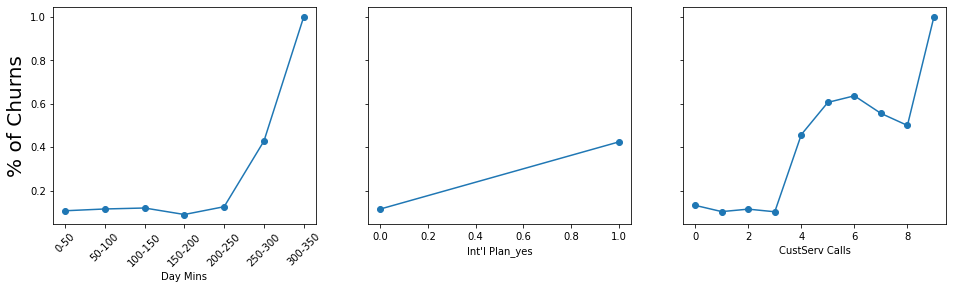

In [48]:
fig, axs = plt.subplots(1,3,figsize=(16,4), sharey=True)
axs = axs.flatten()

parameters = {'axes.labelsize': 20}
plt.rcParams.update(parameters)

#Percentage of Churns by Day Mins groups of length 50
churn_percent0=[]
for i in [0,50,100,150,200,250,350]:
    mask = (i < data_dummies['Day Mins']) & (data_dummies['Day Mins'] < i+50)
    p = data_dummies['Churn'].loc[mask].value_counts(normalize=True).loc[1]
    churn_percent0.append(p)
pd.Series(churn_percent0).plot(marker='o', ax=axs[0])
axs[0].set_xticks([0,1,2,3,4,5,6])
axs[0].set_xticklabels(["0-50","50-100","100-150","150-200","200-250","250-300","300-350"], rotation=45)
axs[0].set_xlabel("Day Mins")
axs[0].set_ylabel("% of Churns", fontsize=20)

#Percentage of Churns by Int'l Plan_yes
crosstab1 = pd.crosstab(data_dummies["Int'l Plan_yes"], data_dummies['Churn'])
churn_percent1 = crosstab1[1] / crosstab1.sum(axis=1)
churn_percent1.plot(marker='o', ax=axs[1], xlabel="Int'l Plan_yes")

#Percentage of Churns by CustServ Calls
crosstab2 = pd.crosstab(data_dummies["CustServ Calls"], data_dummies['Churn'])
churn_percent2 = crosstab2[1] / crosstab2.sum(axis=1)
churn_percent2.plot(marker='o', ax=axs[2])


### 8.3 Feature importances of Logistic Regression

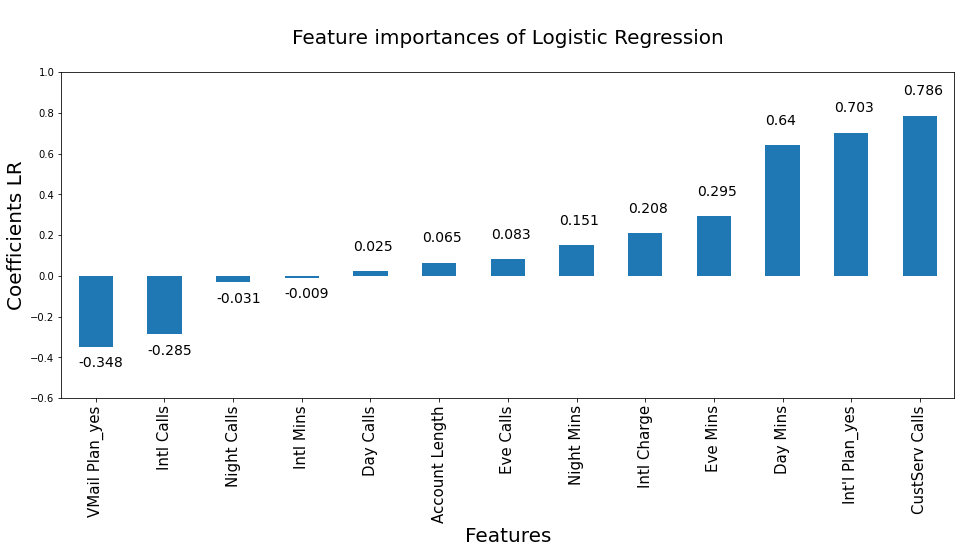

In [49]:
coef_lr = pd.Series(lr.coef_[0], index=X_train.columns).sort_values()

fig, ax = plt.subplots()
ax.set(ylim=(-0.6, 1), ylabel='Coefficients LR', xlabel='Features')
plt.xticks(fontsize=15, rotation=45)
plt.title('\nFeature importances of Logistic Regression\n', fontsize=20)

coef_lr.plot(kind='bar', figsize=(16,6), ax=ax)

for i,value in enumerate(coef_lr):
    ax.text(x=i-0.25, y=value+0.1*np.sign(value), s=str(np.round(value, 3)), fontsize=14)

## 9. Key findings and insights  

Our goals was to interpret customer churns, so find out what variables have strongest influence on customers to leave the company. We have created several classification models, where `Bagging` method with 100 estimators or trees has shown the best performance, not only on the minority class but also on the mayority one, so it has been the one chosen for the feature analysis. According to this analysis, **the most important variables are:**

1. ***Day Mins:*** The total number of calling minutes used during the days
2. ***CustServ Calls:*** The number of calls placed to Customer Service
3. ***Int'l Plan:*** Whether the customer has an international calling plan

Where *Int'l Plan:* and *CustServ Calls:* can be exchangeables in the importances order. Among the other features, *Eve Mins* can be taken into consideration. We can use this information to change into more competitive prices for call minutes during the day or to work on the service quality. On the other hand, the more calls to customer service, the more likely to churn, which we may have expected in advance. In this direction, some actions to be taken could be either to improve the assistance when they call or to reduce the neccesity of calling somehow. On the other hand, ***VMail Plan_yes*** and ***Intl Calls*** are the ones with more impact in customer remaining in the company

**About prediction power:**  
With the bagging model, we have obtained a recall of 0.74 for minority class, so **we are predicting correctly the 74% of the customer actual churns**, with only a 5% of false positive rate (relation between FP and the total of negatives or "Not Churn") and a precision of 72% for the minority class (Churn, 1), so 72% of customers predicted has they will leave, end up leaving the company. 

## 10. Next steps  

Further analysis can be done in order to improve the predictability of the model, for example, we could try:  

* **Other tree-based methods** as boosting can perform well. Decision Trees are good models for interpretation, so we could go through this approaches and try with different variations to find a model that outperform ours.    


* **Esamble methods:** Try with ensamble methods as `VotingClassifier` or `StackingClassifier`, which may produce better predictions, although we had to be careful about overfitting as these models increment the complexity very easily.  


* **Other resampling approaches** Given the importance of the tranining data for the obtaining of a good model, we may do a different resampling method from just the random as we have done so far. For example, we can use a SMOTE method (`imblearn.over_sampling.SMOTE`) as we did for oversampling the minority "Churn" class, and then use *Tomek links* or *Edited Nearest Neighbours* (`imblearn.under_sampling.TomekLinks`, `imblearn.under_sampling.EditedNearestNeighbours`) for the undersampling


* **More data to go further with the insights:** The reasons customers could have to leave the company are mostly related to those 4 variables (Day minutes, Iiternational plan suscription, calls to customer service and evening minutes), however, deeper analysis can be performed to find out what specific causes leads the customer to leave the company. With respect to the variables related to call minutes and international plans, either lower prices of the competition or a better service quality could be behind the churns. On the other hand, data about the reasons why customers call to customer service would be very valuable to decide what actions should be taken.

## Attached  

Bellow it is shown a series of observations and notes for myself from ideas or solved questions arise during the present study. Take a look if you find it useful to a better understanding of approaches carried out in this project

### 1. Coefficients interpretation and scales  

**Coefficients:** Loggistic Regression and SVC output coefficients that go with each feature. They give the idea of how much the term related to the corresponding feature (the addend $\beta_i·x_i$) increments its weight when incrementing 1 unit the value of this feature. So if a coefficient $\beta_1$ is k times $\beta_2$ ($\beta_1$ = k·$\beta_2$), this means that an increment of 1 unit of $x_1$ will have the same effect on the value of the probability p (or the value of the decision function in SVM) as k unit of $x_2$, so we can say that $x_1$ (1 unit) has k times more influence than $x_2$ (1 unit) as we need k units of $x_2$ to be equivalent to 1 of $x_1$ (the lenght of the unit of $x_2$ is smaller). For example with k=2, it could be $\beta_1 = 4$  and $\beta_2 = 2$, being the influence of $x_1$ the double of the influence of $x_2$.

**Scales and Standard Scaling:** On the other hand, the definition of this "unit" varies depending on the scale. For example, after performing a Standard Scaling, the unit will be (each $x_i$ shown now is a different observation value of one specific feature): $\Delta x' = x'_2 - x'_1 = \large \frac{x_2 - \mu}{\sigma} - \frac{x_1 - \mu}{\sigma} = ... = \large \frac{\Delta x}{\sigma}$, where $\Delta x = x_2 - x_1$.  

As we see, $\large \Delta x' = \frac{\Delta x}{\sigma}$, so 1 unit before scaling, $\Delta x = 1$, corresponds to $\Delta x' = 1/\sigma$ afeter scaling. For example, $std('Day Mins') = 54.467389$ for the feature "Day Mins", so 1 minute (the unit before) corresponds to $\small 1/54.467389 = 0.01836 uds$ unit after scaling, which means that 1 unit after scaling is:  

$\hspace{8cm} \small 1uds = 1/0.01836 = 54.467389 min $   

**Standard deviation $\sigma$ is the unit (the 1) after Standar Scaling**. Now we will get different model coefficients, and if the relation between 2 of them is $\beta_1$ = k·$\beta_2$, as this means that k units (current units, after scaling) of $x_1$ has the same impact on the probability p as 1 unit of $x_2$ and now the unit is the corresponding $\sigma$, then "**$k·\sigma_1$ original units (before scaling) will have the same impact as $\sigma_2$ original units of the other feature.**" For example, $\small std("CustServ Calls") = 1.31549$, so if, let's say, $\beta_{CustCalls} = 2·\beta_{DayMins}$, this would mean that *108,9 mins ($2\sigma$) have the same effect on probability p than 1.315 Customer calls* ($\beta_{CustCalls} > \beta_{DayMins}$). "Customer calls is twice more important that Day Mins", which means 2std of Cust Calls have the double of impact than 2std of Day Mins.


&nbsp;


Then, **what is finally the most important one? That is, how much is 108,9 mins and how much is 1.315 Customer calls?** This will have to be measured in relation to the max-min range, for example. We need a reference, which can be this total range of the feature, or it can be just the Standard Deviation. The Standard Deviation is a little more robust against outliers and provides a data interval length where we find the mayority of data, instead of all the data as happens in max-min range. If we think of a feature data between 0-10 normally distributed around 5 with a very little std, being 90% of values between 4 and 6, max-min range will be 10, but std=1 (for example), and 2·std=2 will be a range measure of mayority that reflects that data are virtually (practically) between 4 and 6. Back to the previous question, we would have to divide by the respective standard deviation, which will give us again the coefficients. Therefore, **we can compare the importances just by the coefficients quotient, as long as we take the units into account**, so it's ok if we don't scale the features and at the end we specify that one coefficient being 1,000 times the other means 1,000 [ud1/ud2], for example 1,000 [squared centimeters/room], but *not* that one is 1,000 times more important than the other.

Aclaraciones: 

* Donde "108,9 mins ( 2𝜎 ) have the same effect on probability p than 1.315 Customer calls." se puede ver de otra forma: 1 desviación típica de CustServ Calls tiene el doble de efecto que 1 desviación típica de Day Calls. Si 2 std tienen el mismo efecto que solo 1 std de la otra, esta última tendrá más impacto (es así, aunque pueda dar lugar a confusión, pues a incrementos iguales (en sus respectivas unidades), por ejemplo que las dos se incrementen 2 sigmas, la última tendrá el doble de impacto pues su sumando $\beta·x$ será el doble que el correspondiente sumando $\beta·x$ de la primera  


* Para comparar 2 números tienen que tener las mismas unidades, o no tener unidades. Por esa razón, lo que podríamos comparar son los $\beta · x$, que no tienen unidades. Por eso se pueden sumar, al tener las mismas unidades (sin unidades en este caso)



* **Se pueden comparar importancias mediante los cocientes entre coeficientes, siempre que se tengan en cuenta las unidades:** 

    * Sin scaling: $\frac{\beta_{calls}}{\beta_{mins}} = 108 [\frac{1/call}{1/min}] = 108 [\frac{min}{call}]$ --> 108 minutos por llamada, es decir, 108 minutos tienen el mismo impacto que una llamada, el sumando $\beta_{min}·108$ es igual al sumando $\beta_{calls}·1$    
    
    * Con scaling: $\frac{\beta_{calls}}{\beta_{mins}} = 2 [\frac{1/ud_{min}}{1/ud_{call}}] = 2 [\frac{ud_{min}}{ud_{call}}]$ y como $ud_{min} = 54 min$ y $ud_{call} = 1 call$, $\frac{\beta_{calls}}{\beta_{mins}} = 2·\frac{54}{1} [\frac{min}{call}]$ --> 108 minutos por llamada, es decir, 108 minutos tienen el mismo impacto que una llamada, el sumando $\beta_{min}·108$ es igual al sumando $\beta_{calls}·1$  
    
    * **Con Scaling las $x'_i$ no tienen unidades porque $x'_i=\frac{x_i - \mu}{\sigma} = [\frac{min}{min}]$, por tanto $\beta$ no tienen unidades** y se podrían comparar directamente
    
    No obstante, tras el scaling cambiará la accuracy y muchas cosas y las relaciones entre los coeficientes obtenidos no serán directamente proporcionales a la relación entre las desviaciones estándar. Sí se darán estas relaciones si el escalado fuera simplemente multiplicar por un número, pero no es el caso de Standard Scaling ni de MaxMin Scaling

### 2. Differences in usability of Logistic Regression and Trees  

Logistic Regression give us a model, what actually Trees don't do. With Logistic Regression we get coefficients that tell us *how much* of each feature influence the value of the probability p. Trees splits data by a determined value of a feature, but beyond that we don't know how much an increment of the feature affects the results. 